# Sustavi nelinearnih jednadžbi

----

__Problem:__ nađimo rješenje $\xi=(\xi_1,\xi_2,\ldots,\xi_n)$ sustava od $n$ jednadžbi 

\begin{align*}
f_1(x)&=0,\\
f_2(x)&=0,\\
&\vdots \\
f_n(x)&=0,
\end{align*}

i $n$ nepoznanica $x=(x_1,x_2,\ldots,x_n)$. Uz oznaku $f=(f_1,f_2,\ldots,f_n)^T$, ovaj sustav možemo zapisati kao 

$$
f(x)=0.
$$

Opisat ćemo _Newton-ovu metodu_ i tri _kvazi-Newton-ove_ metode:

2. _Broyden-ovu_ metodu,
3. _Davidon-Fletcher-Powell_ metodu i 
3. _Broyden-Fletcher-Goldfarb-Schano_ metodu.

Sve metode, uz zadanu početnu aproksimaciju $x^{(0)}$,  generiraju niz točaka $x^{(n)}$ koji, uz određene uvjete, konvergira prema rješenju $\xi$. 

__Napomena:__ Opisi metoda se nalaze u knjizi [Numerička matematika, poglavlje 4.4][RS04]. Brojevi primjera se odnose na isto poglavlje.

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."

## Newtonova metoda

__Jacobijan__ ili __Jacobi-jeva matrica__ funkcija $f$ u točki $x$ je matrica prvih parcijalnih derivacija

$$
J(f,x)=\begin{bmatrix} \displaystyle\frac{\partial f_1(x)}{\partial x_1} & \displaystyle\frac{\partial f_1(x)}{\partial x_2} & \cdots &
\displaystyle\frac{\partial f_1(x)}{\partial x_n} \\
\displaystyle\frac{\partial f_2(x)}{\partial x_1} & \displaystyle\frac{\partial f_2(x)}{\partial x_2} & \cdots &
\displaystyle\frac{\partial f_2(x)}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\displaystyle\frac{\partial f_n(x)}{\partial x_1} & \displaystyle\frac{\partial f_n(x)}{\partial x_2} & \cdots &
\displaystyle\frac{\partial f_n(x)}{\partial x_n} 
\end{bmatrix}.
$$

Za zadanu početnu aproksimaciju $x^{(0)}$, računamo niz točaka

$$
x^{(k+1)}=x^{(k)}-s^{(k)}, \quad k=0,1,2,\ldots,
$$

gdje je $s^{(k)}$ rješenje sustava

$$
J\big(f,x^{(k)}\big)\cdot s=f\big(x^{(k)}\big).
$$

Za računanje Jacobijana koristimo paket [`ForwardDiff.jl`](http://www.juliadiff.org/ForwardDiff.jl/perf_diff.html#derivatives). Za crtanje funkcija koristimo paket `PyPlot.jl`.

In [1]:
using ForwardDiff
using PyPlot

In [2]:
function myNewton{T}(f::Function,J::Function,x::Array{T},ϵ::T)
    s=J(x)\f(x)
    ξ=x-s
    iter=0
    while norm(s)>ϵ && iter<100
        x=ξ
        s=J(x)\f(x)
        ξ=x-s
        iter+=1
    end
    ξ,iter
end

myNewton (generic function with 1 method)

### Zadatak 4.4 (a) 

In [3]:
# Zadatak 4.4 (a) (Dennis, Schnabel (1996))
x=Vector{Float64}
fa(x)=[2(x[1]+x[2])^2+(x[1]-x[2])^2-8,5*x[1]^2+(x[2]-3)^2-9]

fa (generic function with 1 method)

In [4]:
fa([1.0,2])

2-element Array{Float64,1}:
 11.0
 -3.0

Nacrtajmo funkcije i konture kako bi mogli približno locirati nul-točke:

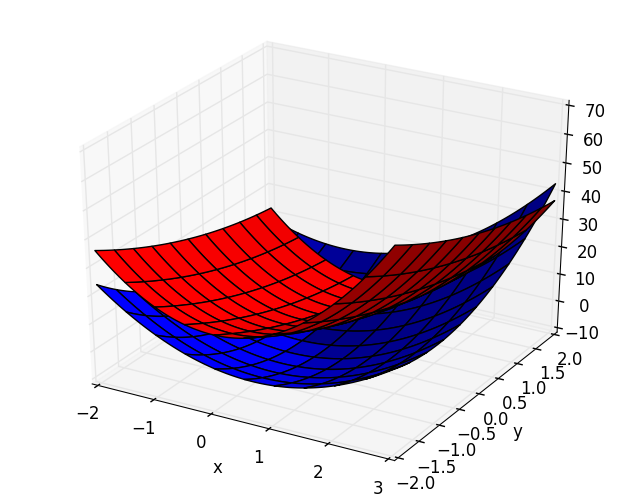

PyObject <matplotlib.text.Text object at 0x7f05e13e3f98>

In [6]:
gridsize=100
X=linspace(-2,3,gridsize)
Y=linspace(-2,2,gridsize)
gridX= map(Float64,[x for x in X, y in Y])
gridY= map(Float64,[y for x in X, y in Y])
# gridX,gridX=meshgrid(X,Y)
Z1=[fa([gridX[i,j],gridY[i,j]])[1] for i=1:gridsize, j=1:gridsize]
Z2=[fa([gridX[i,j],gridY[i,j]])[2] for i=1:gridsize, j=1:gridsize]
surf(gridX,gridY,Z1)
surf(gridX,gridY,Z2,color="red")
xlabel("x")
ylabel("y")

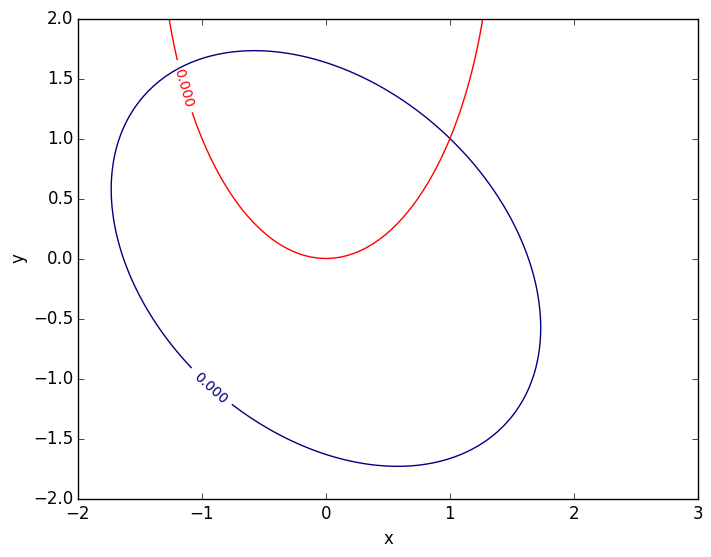

PyObject <matplotlib.text.Text object at 0x7f05e0b06cf8>

In [7]:
C1=contour(gridX,gridY,Z1,levels=[0])
C2=contour(gridX,gridY,Z2,levels=[0],colors="red")
clabel(C1,inline=1, fontsize=10)
clabel(C2,inline=1, fontsize=10)
xlabel("x")
ylabel("y")

Vidimo da su nul-točke približno $x_1=(-1,1.5)$ i $x_2=(1,1)$. Štoviše, $x_2$ je točno jednaka $(1,1)$ (0 iteracija u trećem primjeru). Nadalje, metoda ne mora konvergirati (četvrti primjer).   

In [10]:
x1=[-1.0,0]
x2=[0.5,1.1]
J=jacobian(fa)
myNewton(fa,J,x1,1e-10), myNewton(fa,J,x2,1e-10), 
myNewton(fa,J,[1.0,1],1e-10), myNewton(fa,J,[0.0,0],1e-10)

(([-1.183467003241957,1.5868371427229244],7),([1.0,1.0],5),([1.0,1.0],0),([NaN,NaN],1))

### Zadatak 4.4 (b) 

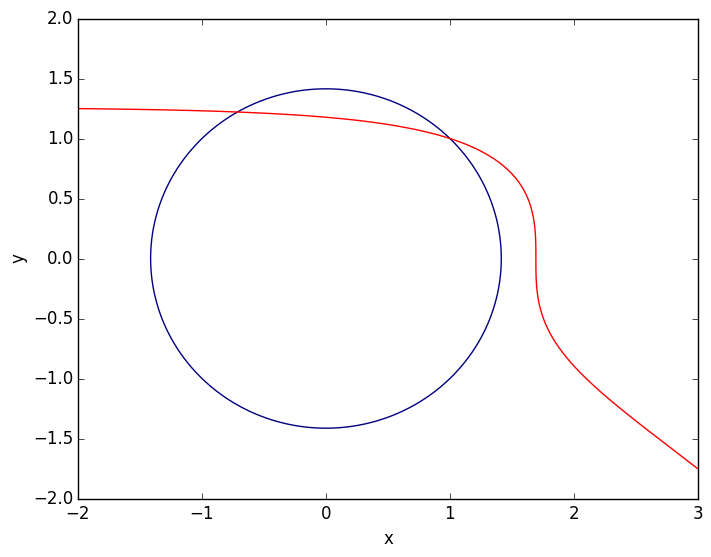

PyObject <matplotlib.text.Text object at 0x7f05e072bd30>

In [11]:
# Zadatak 4.4 (b) (Dennis, Schnabel (1996))
x=Vector{Float64}
fb(x)=[x[1]^2+x[2]^2-2,exp(x[1]-1)+x[2]^3-2]
# Uzet cemo X i Y iz zadatka 4.4 (a) 
Z1=[fb([gridX[i,j],gridY[i,j]])[1] for i=1:gridsize, j=1:gridsize]
Z2=[fb([gridX[i,j],gridY[i,j]])[2] for i=1:gridsize, j=1:gridsize]
C1=contour(gridX,gridY,Z1,levels=[0])
C2=contour(gridX,gridY,Z2,levels=[0],colors="red")
xlabel("x")
ylabel("y")

In [12]:
# U knjizi je navedena samo druga nultočka!
myNewton(fb,jacobian(fb),[-1.0,1],1e-10), myNewton(fb,jacobian(fb),[0.8,1.2],1e-10)

(([-0.7137474114864426,1.220886822189675],4),([1.0,0.9999999999999999],4))

### Zadatak 4.4 (c) 

Točna rješenja su $x_1=(0,0,0)$ i $x_2=(0,-1,0)$. Izračunat ćemo nul-točke s nekoliko početnih aproksimacija.

In [13]:
# Zadatak 4.4 (c) (Dennis, Schnabel (1996))
x=Vector{Float64}
fc(x)=[x[1],x[2]^2+x[2],exp(x[3])-1]
J=jacobian(fc)

j (generic function with 1 method)

In [14]:
myNewton(fc,J,[-1.0,1.0,0.0],1e-10),myNewton(fc,J,[1.0,1,1],1e-10),
myNewton(fc,J,[-1.0,1,-10],1e-10),myNewton(fc,J,[0.5,-1.5,0],1e-10)

(([0.0,0.0,0.0],6),([0.0,0.0,7.783724715122231e-17],6),([0.0,0.06666666666666665,NaN],1),([0.0,-1.0,0.0],5))

### Zadatak 4.4 (d) 

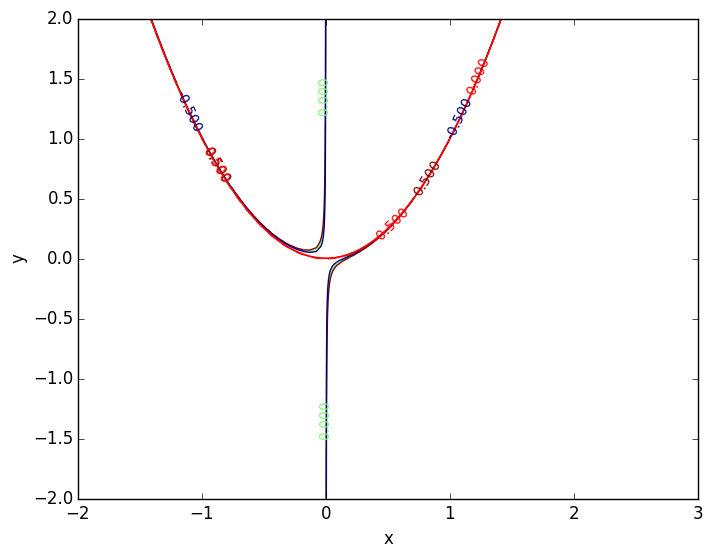

PyObject <matplotlib.text.Text object at 0x7f05e0b55390>

In [15]:
# Zadatak 4.4 (d) (Rosenbrock parabolic valley)
x=Vector{Float64}
fd1(x)=100(x[2]-x[1]^2)^2+(1-x[1])^2
fdg=gradient(fd1)
# Uzet cemo X i Y iz zadatka 4.4 (a) 
Z1=[fdg([gridX[i,j],gridY[i,j]])[1] for i=1:gridsize, j=1:gridsize]
Z2=[fdg([gridX[i,j],gridY[i,j]])[2] for i=1:gridsize, j=1:gridsize]
C1=contour(gridX,gridY,Z1,levels=[0,0.5,-0.5])
C2=contour(gridX,gridY,Z2,levels=[0,0.5,-0.5],colors="red")
clabel(C1,inline=1, fontsize=10)
clabel(C2,inline=1, fontsize=10)
xlabel("x")
ylabel("y")

Iz kontura vidimo da je primjer numerički zahtjevan! Analitički lako vidimo da je jedina nul-točka $x_1=(1,1)$.

> U ovom primjeru funkcija je zadana kao gradijent skalarne funkcije pa trebamo koristiti `hessian()`

In [16]:
myNewton(gradient(fd1),hessian(fd1),[-1.0,2.0],1e-10)

([0.9999999926662775,0.9999999853325551],6)

### Zadatak 4.4 (e) 

Za razliku od prethodnih zadataka, gdje je kondicija $$\kappa(J)=O(10)$$ u zadacima (a), (b) i (c) i 
$$\kappa(J)=O(1000)$$ u zadatku (d), u ovom zadatku je $$\kappa(J)>O(10^6)$$ 

pa je metoda netočna i ne konvergira prema točnom rješenju $x_1=(4.93,2.62,0.28)$.

In [17]:
t=collect(0:10)
y=[0.001,0.01,0.04,0.12,0.21,0.25,0.21,0.12,0.04,0.01,0.001]
x=Vector{Float64}
fe(x)=sum([( x[3]*exp(-((t[i]-x[1])^2/x[2]))-y[1])^2 for i=1:11])

fe (generic function with 1 method)

In [18]:
x0=[4.9,2.63,0.28]
fe(x0)
feg=gradient(fe)
J=hessian(fe)
feg(x0), cond(J(x0))

([2.7155332552750953e-6,0.0299859612654649,1.132474407199803],173703.69351181702)

In [19]:
x1,iter=myNewton(feg,J,x0,1e-8)

([6.496651252522882,0.007965957737052751,1.3642915212473148e-5],32)

In [20]:
feg(x1)

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

In [21]:
x0=[4.9,2.62,0.28]
x1,iter=myNewton(feg,J,x0,1e-8)

([NaN,NaN,NaN],12)

## Broyden-ova metoda

Za odabranu početnu aproksimaciju $x_0$ i matricu $B_0$, za $k=0,1,2,\ldots$, računamo redom:

\begin{align*}
B_k \cdot s & = -f(x_k) \quad \textrm{(sustav)}\\
x_{k+1}&=x_{k}+s\\
y&=f(x_{k+1})-f(x_{k})\\
B_{k+1}&=B_k+\frac{(y-B_ks)s^T}{s\cdot s}
\end{align*}

In [22]:
function myBroyden{T}(f::Function,B::Matrix,x::Array{T},ϵ::T)
    s=-(B\f(x))
    ξ=x+s
    iter=0
    while norm(s)>ϵ && iter<100
        y=f(ξ)-f(x)
        B=B+(y-B*s)*s'/(s⋅s)
        x=ξ
        s=-(B\f(x))
        ξ=x+s
        iter+=1
    end
    ξ,iter
end

myBroyden (generic function with 1 method)

In [23]:
# Zadatak 4.4 (a)
x0=[-1.0,0.0]
x1=[1.0,1.5]
myBroyden(fa,jacobian(fa)(x0),x0,1e-10), myBroyden(fa,jacobian(fa)(x1),x1,1e-10)

(([-1.1834670032419574,1.586837142722924],11),([0.9999999999999917,0.9999999999999969],6))

In [24]:
# Zadatak 4.4 (b)
x0=[-1.0,1]
x1=[0.8,1.2]
myBroyden(fb,jacobian(fb)(x0),x0,1e-10), 
myBroyden(fb,jacobian(fb)(x1),x1,1e-10)

(([-0.713747411486444,1.2208868221896745],8),([1.0000000000000002,0.9999999999999999],8))

In [25]:
# Zadatak 4.4 (c)
x0=[-1.0,1,0]
x1=[0.5,-1.5,0]
myBroyden(fc,jacobian(fc)(x0),x0,1e-10), 
myBroyden(fc,jacobian(fc)(x1),x1,1e-10)

(([0.0,5.965361234900634e-26,0.0],8),([0.0,-1.0,0.0],7))

In [26]:
# Zadatak 4.4 (d)
x0=[-1.0,2]
x1=[0.8,0.5]
myBroyden(gradient(fd1),hessian(fd1)(x0),x0,1e-10), # ali
myBroyden(gradient(fd1),hessian(fd1)([1,2.0]),x0,1e-10),
myBroyden(gradient(fd1),hessian(fd1)(x1),x1,1e-10)

(([0.8317547067262813,0.6918384690335156],100),([0.9999999998849671,0.9999999997477232],3),([0.9999999926663056,0.999999985332611],28))

In [27]:
# Zadatak 4.4 (e)
x0=[4.9,2.6,0.2]
myBroyden(gradient(fe),hessian(fe)(x0),x0,1e-10)

([18.899763612800356,1.323940826405876,0.06655025062295207],5)

## Davidon-Fletcher-Powell (DFP) metoda

Za odabranu početnu aproksimaciju $x_0$ i matricu $B_0$, za $k=0,1,2,\ldots$, računamo redom:

\begin{align*}
B_k \cdot s & = f(x_k)\\
x_{k+1}&=x_{k}-s\\
y&=f(x_{k+1})-f(x_{k})\\
B_{k+1}&=B_k-\frac{(y+B_ks)s^T}{s\cdot s}
\end{align*}

> __U RADU__

In [28]:
function myDFP{T}(f::Function,B::Matrix,x::Array{T},ϵ::T)
    s=B*f(x)
    ξ=x-s
    iter=0
    while norm(s)>ϵ && iter<50
        y=f(ξ)-f(x)
        z=B*y
        B=B-s*s'/(y⋅s)-z*z'/(y⋅z)
        # @show B,eigvals(B),y⋅z
        x=ξ
        s=B*f(x)
        ξ=x-s
        iter+=1
    end
    ξ,iter
end

myDFP (generic function with 1 method)